In [1]:
import time
import matplotlib.pyplot as plt
import matplotlib as cm
import math

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
import csv
import pandas as pd


def happy_panda(df, bt, gt, trim_by='quality', desired_columns=0):
    '''
    Parameters
    -----------
    params : list
      List of column names to be returned.
      (shoud be in your data)
    gt, bt : int
      Good and bad tresholds to trim (>= gt and <= bt)
    sep : string
      Separator of your data
      (default value is ';')
    trim_by : string
      Name of the column by which your data will be trimmed
    '''
    treshold_data = df[~df[trim_by].isin(range(bt, gt + 1))]
    bools = pd.Series(treshold_data[trim_by].apply(lambda x: 1 if x >= gt else -1), name='GoodBad')
    data = treshold_data if not desired_columns else treshold_data[desired_columns]
    concatenated = pd.concat([data, bools], axis=1)
    return(concatenated)

url = "https://raw.githubusercontent.com/katolikyan/sommelier/master/resources/winequality-red.csv"
try:
    df = pd.read_csv(url, ';')
except FileNotFoundError:
    print("[-] Link doesn't contain .csv file")



# Load data & imports


# V.1  Exploring the green reds

### a) Plotting wine data
Write a **function** that will plot a **scatterplot matrix** of your red wine data. Your function should plot wines with quality over some “good_threshold” as one color,and wines below some “bad_threshold” as another. Your plotting function should have the option to save a .png of your plots. Here’s an example function definition:



```
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False)
```



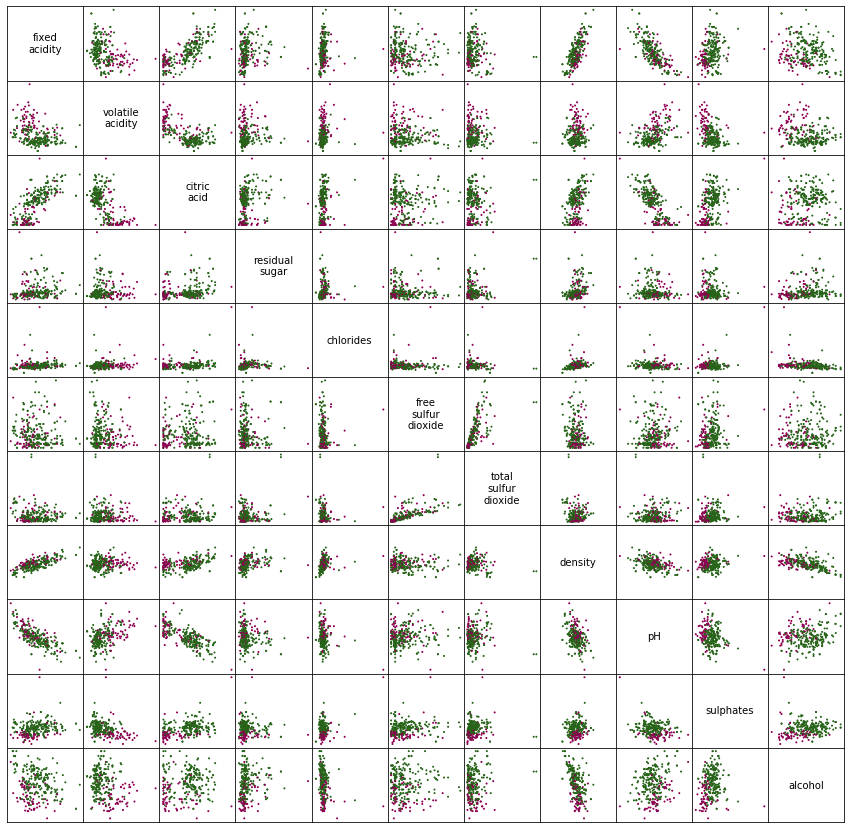

In [2]:

def plot_scatter_matrix(wine_data, save_plot=False):
    headers = list(wine_data.columns.values) 
    fig, axs = plt.subplots(len(headers) - 2, len(headers) - 2, figsize=(15, 15))
    for i, k in zip((headers[0:-2]), range(len(headers))):
      for j, l in zip((headers[0:-2]), range(len(headers))):  
        if i == j:
          axs[k, l].text(0.5, 0.5, j.replace(' ', '\n'), va='center', ha='center')
        else:
          axs[k, l].scatter(wine_data[j], wine_data[i], s=1, c=wine_data['GoodBad'], cmap='PiYG')
        axs[k, l].tick_params(bottom=0, labelbottom=0, labelleft=0, left=0)
    fig.subplots_adjust(wspace=0, hspace=0)
    #auto-download only works in Chrome
    if save_plot:
      plt.savefig("Wines_Plot.png")
      files.download("Wines_Plot.png")
    else:  
      plt.show()


plot_scatter_matrix(happy_panda(df, 5, 6))



### b) Analyze plotted data


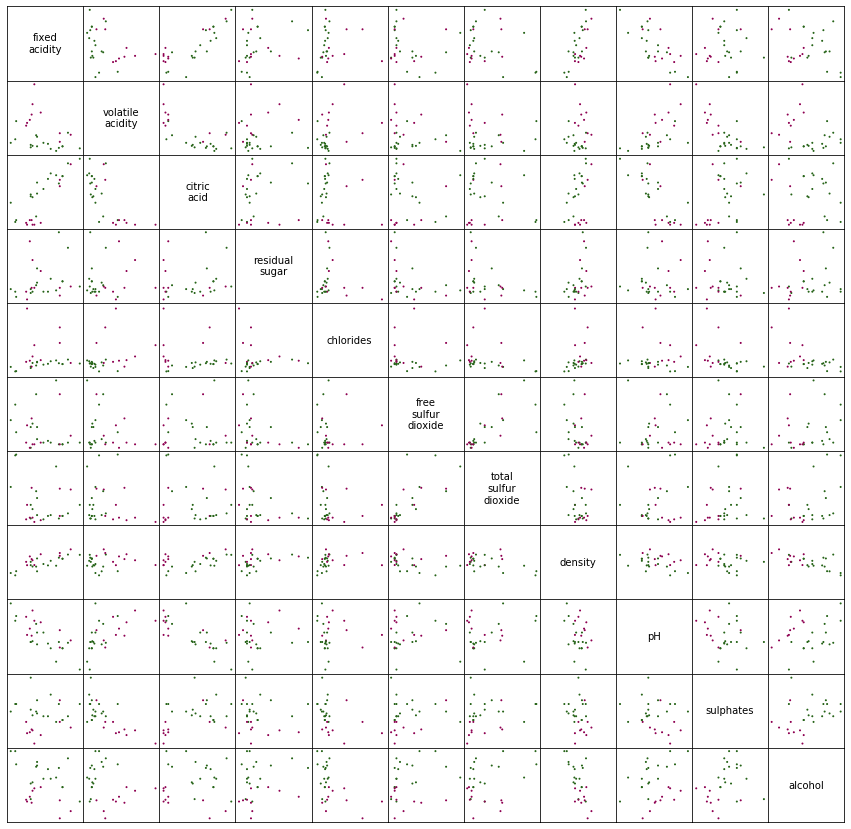

In [3]:
plot_scatter_matrix(happy_panda(df, 4, 7))

# V.2 Learning to perceptron

### a) Implement a perceptron that:


*   Has randomly initialized weights and bias
*   Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
*   Utilizes the heaviside step activation function (discrete version)






### b) You’ll need to implement a function to train your perceptron. 
Your training function should take in your red wine data as a parameter and should:


*   Have a way to specify number of training epochs
*   Train your perceptron until it makes no errors, if training epochs is set to 0
*   Have a way to specify learning rate
*   Return a list of python tuples containing (performance):
```
[(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias), . . . ]
```







In [4]:
#class init
class perceptron:

    import random

    def __init__(self, num):
        self.w = list(map(lambda x: self.random.uniform(-1, 1), range(num)))
        self.b = self.random.uniform(-1, 1)
        self.log = []

    def activation(self, s):
        if s > 0:
            return 1
        else:
            return -1

    def summatory(self, x, b):
        summ = 0
        for i in range(len(self.w)):
            summ += self.w[i] * x[i]
        summ += self.b
        return summ

    #b) You’ll need to implement a function to train your perceptron
    def learning_simple(self, data, y, ep_num, learning_rate):
        y_out = []
        epoch = 1

        # training loop:
        while True:
            errors = 0
            learned = 1
            y_out[:] = []   # clean output;
            # get output:
            for x in data:
                y_out.append(self.activation(self.summatory(x, self.b))) # get output for each vine;
            #learn:
            for i in range(len(y)):
                if y[i] != y_out[i]: # compare output with expected;
                    errors += 1
                    learned = 0
                    for j in range(len(self.w)):
                        self.w[j] += learning_rate * (y[i] - y_out[i]) * data[i][j] # balance weights for each parametr;
                    self.b += learning_rate * (y[i] - y_out[i])                                     # balance bias
            self.log.append((epoch, errors, self.w.copy(), self.b))
            if (epoch == ep_num) or learned:
                break
            epoch += 1

### c) Now that you have a perceptron, a way to train your perceptron, and some data, youneed a way to confirm that your perceptron actually works. 
Write a **function** that will take the output of your perceptron training function and your red wine data and **generate two plots in one figure**:


*   The first plot should **plot the number of errors your perceptron made as a function of epoch**.Be careful with how you calculate errors!
*   The second plot shouldplot the decision boundary of your perceptronand also show ‘good’ and ‘bad’ wine data points on the final trainingepoch. This second plot should also shade ‘good’ and ‘bad’ areas
*   Your function should allow the user to specify a specific epoch and see whatthe decision boundary of the perceptron was on that epoch.  If a negativeepoch is given, cause the plots to show the last epoch.









In [5]:
def plot_scatter_trained(neuron, wd_x, wd_y):
    plt.figure(figsize=(15, 5))

    #---plot errors
    plt.subplot(1, 2, 1)
    plt.plot([neuron.log[i][0] for i in range(len(neuron.log))], \
             [neuron.log[i][1] for i in range(len(neuron.log))])
    plt.xlabel('epoch')
    plt.ylabel('classification errors')
    plt.title('Errors as a function of epoch')

    #---scatter plot
    plt.subplot(1, 2, 2)
    scat_1 = ('green', 'good wines (>' + str(gt) + ' score)', 1)
    scat_2 = ('magenta', 'bad wines (<' + str(bt) + ' score)', -1)
    for color in (scat_1, scat_2):
        plt.scatter([wd_x[i][1] for i in range(len(wd_y)) if wd_y[i] == color[2]], \
                    [wd_x[i][0] for i in range(len(wd_y)) if wd_y[i] == color[2]], \
                    s=8, c=color[0], label=color[1])

    #---getting window coordinates for clipping
    xmin, xmax, ymin, ymax = plt.axis()

    #---plotting decision boundary. calculating k,b in y = kx + b and drawing the
    #---line in clipped window + filling sides with colors.
    x1 = (-1 * neuron.b) / neuron.w[1] # y1 = 0
    y2 = (-1 * neuron.b) / neuron.w[0] # x2 = 0
    k = (y2 - 0)/(0 - x1)
    plt.plot([xmin, xmax], [k * xmin + y2, k * xmax + y2], \
            linestyle='--', color='black', linewidth=1, label='Decision Boundary')
    plt.fill_between([xmin, xmax], [k * xmin + y2, k * xmax + y2], ymax, color='magenta', alpha=.2)
    plt.fill_between([xmin, xmax], [k * xmin + y2, k * xmax + y2], ymin, color='Green', alpha=.2)

    #---plot characteristics:
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xlabel('alchogol')
    plt.ylabel('pH')
    plt.title('Decision Boundary on epoch: ' + str(neuron.log[-1][0]))
    plt.legend(loc='best', framealpha=0.4, prop={'size': 6})
    plt.show()
    
    
def plot_scatter_validation(neuron, wd_x, wd_y, wd_x_a, wd_y_a, errors):
    plt.figure(figsize=(15, 5))
    #---scatter plot training
    plt.subplot(1, 2, 1)
    scat_1 = ('green', 'good wines (>' + str(gt) + ' score)', 1)
    scat_2 = ('magenta', 'bad wines (<' + str(bt) + ' score)', -1)
    for color in (scat_1, scat_2):
        plt.scatter([wd_x[i][1] for i in range(len(wd_y)) if wd_y[i] == color[2]], \
                    [wd_x[i][0] for i in range(len(wd_y)) if wd_y[i] == color[2]], \
                    s=8, c=color[0], label=color[1])
    #---getting window coordinates for clipping
    xmin, xmax, ymin, ymax = plt.axis()
    #---plotting decision boundary. calculating k,b in y = kx + b and drawing the
    #---line in clipped window + filling sides with colors.
    x1 = (-1 * neuron.b) / neuron.w[1] # y1 = 0
    y2 = (-1 * neuron.b) / neuron.w[0] # x2 = 0
    k = (y2 - 0)/(0 - x1)
    plt.plot([xmin, xmax], [k * xmin + y2, k * xmax + y2], \
            linestyle='--', color='black', linewidth=1, label='Decision Boundary')
    plt.fill_between([xmin, xmax], [k * xmin + y2, k * xmax + y2], ymax, color='magenta', alpha=.2)
    plt.fill_between([xmin, xmax], [k * xmin + y2, k * xmax + y2], ymin, color='Green', alpha=.2)
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xlabel('alchogol')
    plt.ylabel('pH')
    plt.title('Decision Boundary on epoch: ' + str(neuron.log[-1][0]))
    plt.legend(loc='best', framealpha=0.4, prop={'size': 6})

    #---scatter plot validation:
    plt.subplot(1, 2, 2)
    for color in (scat_1, scat_2):
        plt.scatter([wd_x_a[i][1] for i in range(len(wd_y_a)) if wd_y_a[i] == color[2]], \
                    [wd_x_a[i][0] for i in range(len(wd_y_a)) if wd_y_a[i] == color[2]], \
                    s=8, c=color[0], label=color[1], marker='x')
    #---plotting decision boundary. calculating k,b in y = kx + b and drawing the
    #---line in clipped window + filling sides with colors.
    plt.plot([xmin, xmax], [k * xmin + y2, k * xmax + y2], \
            linestyle='--', color='black', linewidth=1, label='Decision Boundary')
    plt.fill_between([xmin, xmax], [k * xmin + y2, k * xmax + y2], ymax, color='magenta', alpha=.2)
    plt.fill_between([xmin, xmax], [k * xmin + y2, k * xmax + y2], ymin, color='Green', alpha=.2)
    plt.axis([xmin, xmax, ymin, ymax])
    plt.xlabel('alchogol')
    plt.ylabel('pH')
    plt.title('Decision boundary validation\n Errors: ' + str(errors))
    plt.legend(loc='best', framealpha=0.4, prop={'size': 6})
    plt.show()
    

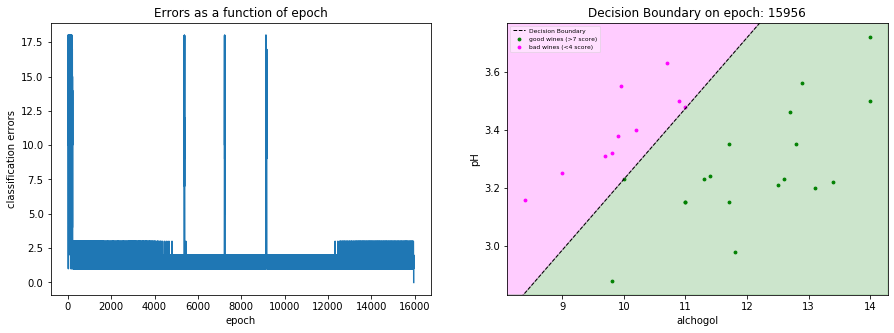

In [6]:
gt = 7 #good trashold
bt = 4 #bad trashold

wine_data = happy_panda(df, bt, gt, desired_columns=['pH', 'alcohol', 'quality'])
neuron = perceptron(len(wine_data.loc[:, 'pH':'alcohol'].values[0] - 1))
neuron.learning_simple(wine_data.loc[:, 'pH':'alcohol'].values, \
                       wine_data.loc[:, 'GoodBad'].values, 20000, 0.3)
plot_scatter_trained(neuron, wine_data.loc[:, 'pH':'alcohol'].values, \
                     wine_data.loc[:, 'GoodBad'].values)

### d) Your perceptron appears to work. . . but why is it taking so many epochs to train? 
Maybe you can modify the red wine data to help the perceptron learn more quickly? **Use the function you just created in part c) to plot and verify that your perceptron is learning more efficiently!**









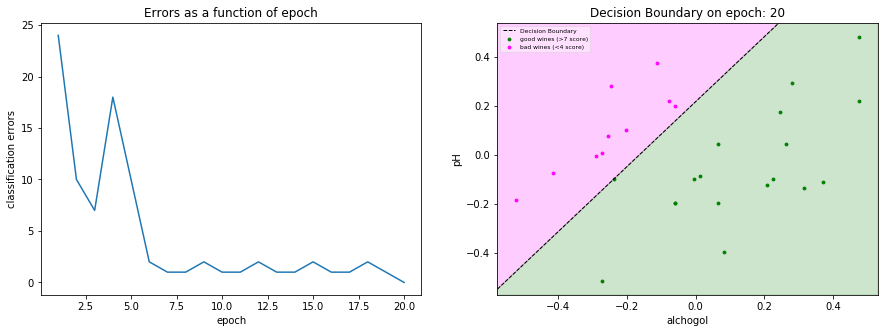

In [7]:
def norm_data(wd):
    '''
    this function allows to normolize different NxM data matrixes
    x' = (x - avg)/(xmax - xmin)
    '''
    wd_sc = wd.copy()
    ranges = []
    means = []
    for i in range(len(wd.iloc[0])):
        ranges.append(max(wd.iloc[:, i] - min(wd.iloc[:, i])))
        means.append(sum(wd.iloc[:, i]) / len(wd.iloc[:, i]))
    for i in range(len(wd.iloc[0])):
        for j in range(len(wd)):
            wd_sc.iloc[j][i] = (wd.iloc[j][i] - means[i]) / ranges[i]
    return wd_sc

wd_sc = norm_data(wine_data.iloc[:, 0:2])

#---train another neuron with normalized dataset and print it
neuron_2 = perceptron(len(wine_data.loc[:, 'pH':'alcohol'].values[0] - 1))
neuron_2.learning_simple(wd_sc.loc[:, 'pH':'alcohol'].values, \
                         wine_data.loc[:, 'GoodBad'].values, 300, 0.3)
plot_scatter_trained(neuron_2, wd_sc.loc[:, 'pH':'alcohol'].values, \
                     wine_data.loc[:, 'GoodBad'].values)


# V.3 My fair ADALINE
Encouraged by the results of your perceptron, you decide to see if you can use it to **distinguish between wines with a score of 4 and lower, and wines with a score of 7 and higher**.
Feeling confident, you decide to let the perceptron train until it canfind the best decision boundary.

In [8]:
class adaline:

    import random
    import math

    def __init__(self, num):
        self.w = list(map(lambda x: self.random.uniform(-1, 1), range(num)))
        self.b = self.random.uniform(-1, 1)
        self.log = []

    def activation(self, s):
        return (1 if s > 0 else -1)
        #return 1 / (1 + self.math.exp(-(s)))

    def summatory(self, x):
        summ = 0
        for i in range(len(self.w)):
            summ += self.w[i] * x[i]
        summ += self.b
        return summ

    def target(self, y_out, y):
        return sum([(y[i] - y_out[i]) ** 2 for i in range(len(y))]) / 2.0

    def gdl(self, data, y, ep_num, learning_rate, theta):
        y_out = []
        epoch = 1;

        # training loop:
        while True:
            learned = 1
            y_out[:] = []   # clean output;

            # get output:
            for x in data:
                y_out.append(self.summatory(x)) # get output for each vine;
            #learn:
            if self.target(y_out, y) > theta:
                learned = 0
                for i in range(len(y)):
                    for j in range(len(self.w)):
                        self.w[j] += learning_rate * (y[i] - y_out[i]) * data[i][j] # balance weights for each parametr;
                    self.b += learning_rate * (y[i] - y_out[i])
            self.log.append((epoch, self.target(y_out, y), self.w.copy(), self.b))
            if (epoch == ep_num) or learned:
                break
            epoch += 1


    def gdl_online(self, data, y, ep_num, learning_rate, theta):
        y_out = []
        epoch = 1;

        # training loop:
        while True:
            learned = 1
            y_out[:] = []   # clean output;

            # get output:
            for x in data:
                y_out.append(self.summatory(x)) # get output for each vine;
            #learn:
            if self.target(y_out, y) > theta:
                learned = 0
                for i in range(len(y)):
                    for j in range(len(self.w)):
                        self.w[j] += learning_rate * (y[i] - self.summatory(data[i])) * data[i][j] # balance weights for each parametr;
                    self.b += learning_rate * (y[i] - y_out[i])

            self.log.append((epoch, self.target(y_out, y), self.w.copy(), self.b))
            if (epoch == ep_num) or learned:
                break
            epoch += 1

    def predict(self, data):
        predictions = []
        for x in data:
            predictions.append(self.activation(self.summatory(x)))
        return (predictions)

### a) Marvin notices and chides you for torturing your perceptron. Why?

You decide to upgrade your perceptron to handle this harder classification task. You’veheard a bit about the gradient descent technique and also about ADALINE, maybe thesewill do the trick?

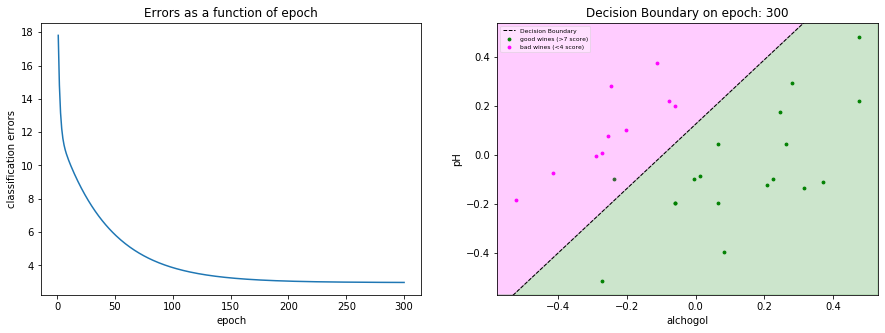

In [9]:

ada = adaline(len(wine_data.loc[:, 'pH':'alcohol'].values[0] - 1))
ada.gdl(wd_sc.loc[:, 'pH':'alcohol'].values, \
            wine_data.loc[:, 'GoodBad'].values, 300, 0.01, 2)
plot_scatter_trained(ada, wd_sc.loc[:, 'pH':'alcohol'].values, \
                     wine_data.loc[:, 'GoodBad'].values)

### b) Implement an ADALINE that:

*    Has randomly initialized weights and bias
*    Uses a linear activation function and some kind of quantizer
*    Uses the Widrow-Hoff learning rule



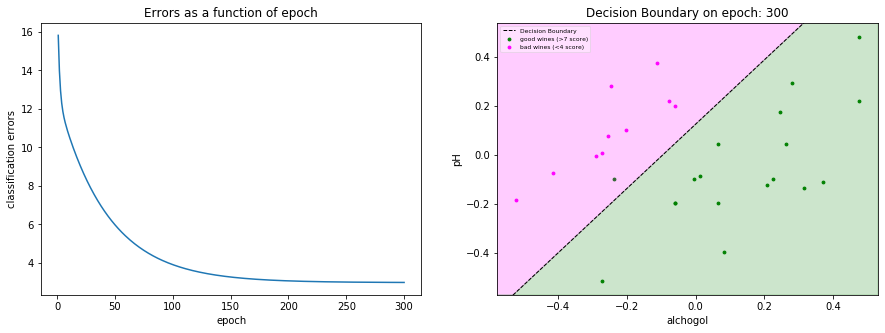

In [10]:
ada = adaline(len(wine_data.loc[:, 'pH':'alcohol'].values[0] - 1))
ada.gdl_online(wd_sc.loc[:, 'pH':'alcohol'].values, \
            wine_data.loc[:, 'GoodBad'].values, 300, 0.01, 2)
plot_scatter_trained(ada, wd_sc.loc[:, 'pH':'alcohol'].values, \
                     wine_data.loc[:, 'GoodBad'].values)

### c)You’ll need to implement a function to train your ADALINE. Your training functionshould:

*    Take in your red wine data as a parameter
*    Have a way to specify number of training epochs
*    If training epochs is set to 0, your ADALINE should train until it convergeson a good set of weights.
*    Have a way to specify learning rate.
*    Have an option to perform either online learning or batch learning



In [11]:
#look inside of the class (function gdl)

### c) Find a good learning rate for your ADALINE
...and plot number of classification errorsvs. epoch and the decision boundary of your ADALINE. What settings tend to givethe smallest number of classification errors? Support your reasoning with exampleplots!



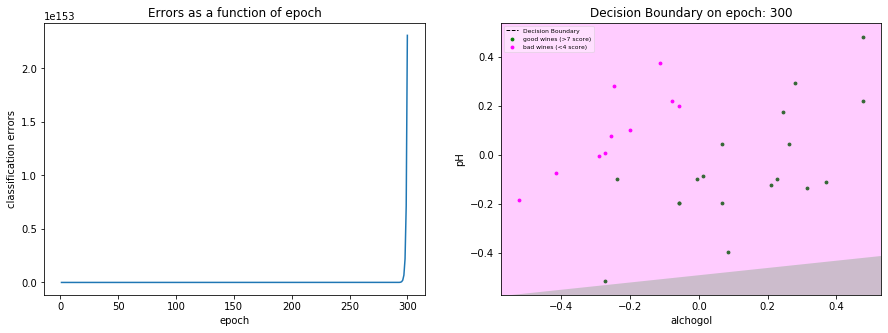

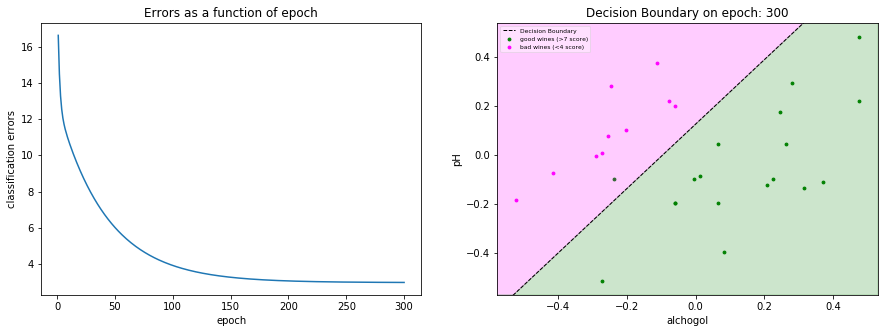

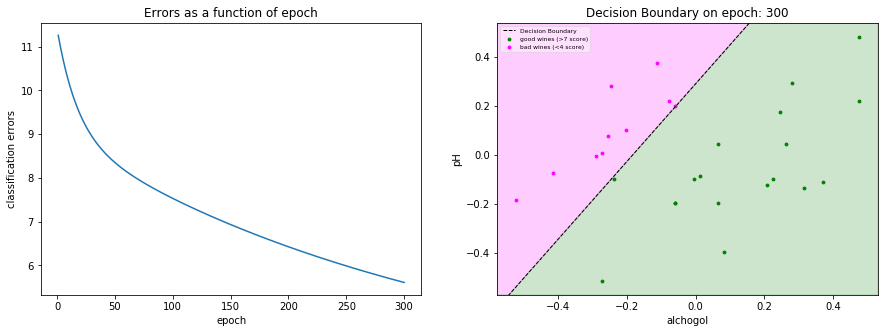

In [12]:
for i in [0.1, 0.01, 0.001]:
    ada.__init__(len(wine_data.loc[:, 'pH':'alcohol'].values[0] - 1))
    ada.gdl(wd_sc.loc[:, 'pH':'alcohol'].values, wine_data.loc[:, 'GoodBad'].values, 300, i, 2)
    plot_scatter_trained(ada, wd_sc.loc[:, 'pH':'alcohol'].values, \
                         wine_data.loc[:, 'GoodBad'].values)

# V.4 Advanced wine sampling and resampling
So far, you’ve been using all your data to train your ADALINE. Training your ADALINEmany times on a dataset improves its performance for that dataset. But, too much train-ing can lead to overfitting. This can lead to poor performance when the ADALINE en-counters new data it has never seen before. Using a validation set and/or cross-validation methodologies reduces (but doesn’t completely eliminate!) the possibility of overfitting!

### a) Write afunction
...that uses the holdout method to partition the red wine data into atraining and a validation set. The function should take a parameter to adjust theproportion of training to validation data. It should return a tuple containing:

```
(training_pandas_dataframe, validation_pandas_dataframe)
```





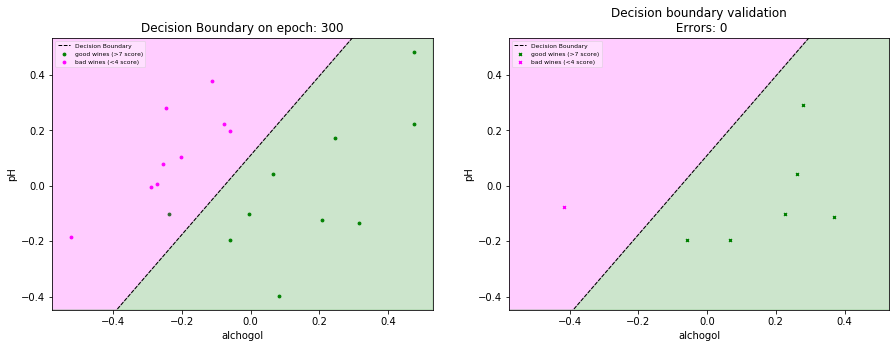

holdout:  1.0


In [13]:
def proportion(percent, data, shuffle=False):
  if shuffle:
    data = data.sample(frac=1)
  boundary = int(len(data) * percent)
  return (data.iloc[boundary:-1], data.iloc[0:boundary])

def validation_holdout(percent, data, shuffle=False):
    if shuffle:
        data.sample(frac=1)
    boundary = int(len(df) * percent)
    return (data.iloc[0:boundary], data.iloc[boundary:-1])


wd_sc = norm_data(wine_data.iloc[:, 0:2])
wd_sc = pd.concat([wd_sc, wine_data.loc[:, 'GoodBad']], axis=1)

#---HoldOut data validation set
df_ho = proportion(0.3, wd_sc)

ada.__init__(len(wine_data.loc[:, 'pH':'alcohol'].values[0] - 1))
ada.gdl(df_ho[0].loc[:, 'pH':'alcohol'].values, df_ho[0].loc[:, 'GoodBad'].values, 300, 0.01, 2)

answ = ada.predict(df_ho[1].loc[:, 'pH':'alcohol'].values)


predict_err = sum([True for i in range(len(answ)) \
                if df_ho[1].loc[:, 'GoodBad'].values[i] != answ[i]])
plot_scatter_validation(ada, df_ho[0].loc[:, 'pH':'alcohol'].values, \
                        df_ho[0].loc[:, 'GoodBad'].values, \
                        df_ho[1].loc[:, 'pH':'alcohol'].values, \
                        df_ho[1].loc[:, 'GoodBad'].values, predict_err)

print("holdout: ", 1 - predict_err/len(answ))

### b) Write a function
...that generates a k-fold cross-validation dataset from the red winedata. The function should allow k to be arbitrarily adjusted and also have an op-tional setting to shuffle data before creating k-folds. The function should return alist of ‘k’ tuples witheachtuple containing:

```
(training_pandas_dataframe, cross_validation_pandas_dataframe)
```





In [14]:
def k_fold(num_folds, data):
    step = int(len(data) / num_folds)
    folds = ()
    result = []
    for x, y in zip(range(0, len(data), step), range(step, len(data) + step, step)):
        folds += (tuple([data.iloc[x:y]]))
    for i in range(num_folds):
        result.append((pd.concat([folds[x] for x in range(len(folds)) if not x == i], axis = 0), folds[i]))
    return result

#### c) What effects does changing learning rate and number of training epochs have on the ADALINE when evaluated via k-fold cross-validation? 
To address this question,you should write (or modify) a function that will train and assess the ADALINEon each training and cross-validation fold produced by your k-fold function.





21 7


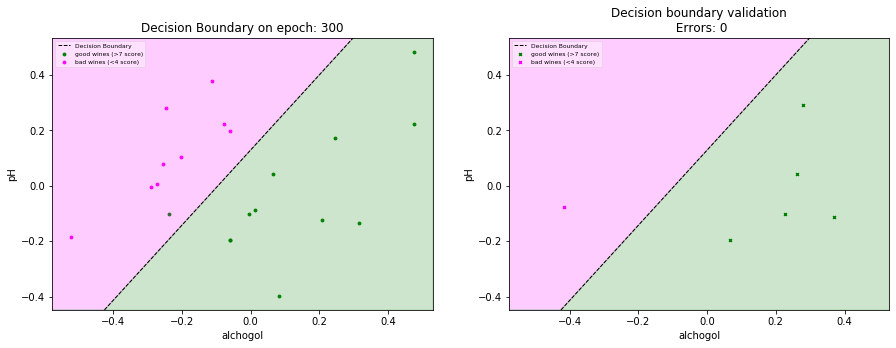

k_folds:  1.0
21 7


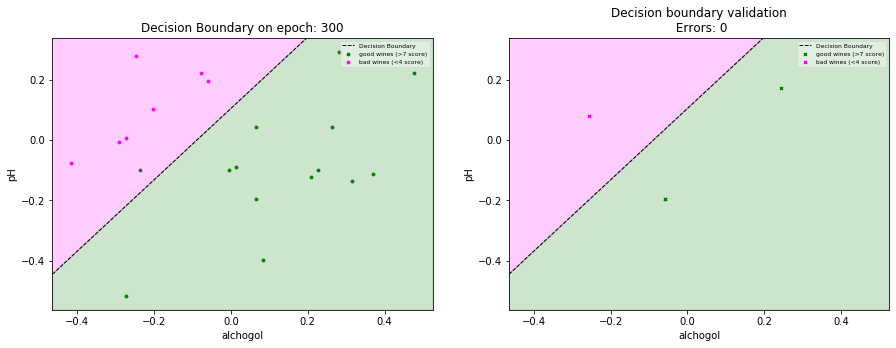

k_folds:  1.0
21 7


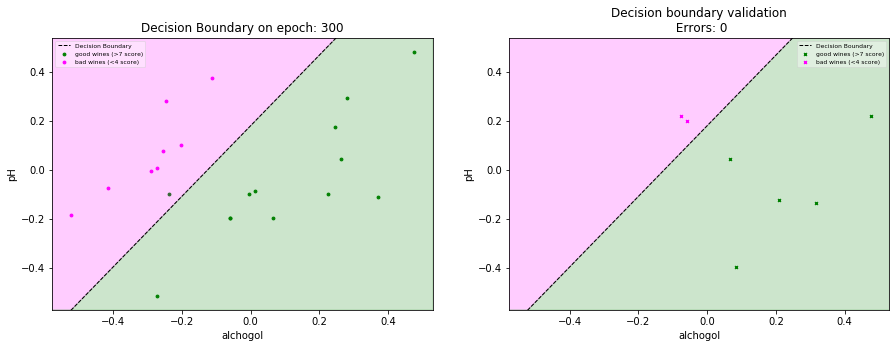

k_folds:  1.0
21 7


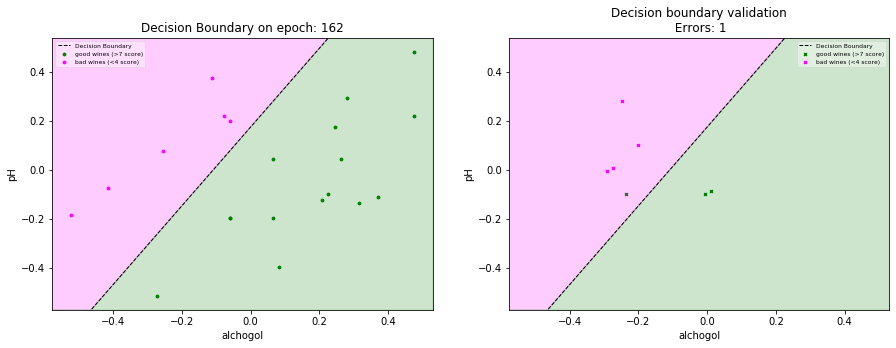

k_folds:  0.8571428571428572


In [15]:
df_kf = k_fold(4, wd_sc)

for fold in df_kf:
    print(len(fold[0]), len(fold[1]))
    ada.__init__(len(wine_data.loc[:, 'pH':'alcohol'].values[0] - 1))
    ada.gdl(fold[0].loc[:, 'pH':'alcohol'].values, fold[0].loc[:, 'GoodBad'].values, 300, 0.01, 2)
    answ = ada.predict(fold[1].loc[:, 'pH':'alcohol'].values)
    predict_err = sum([True for i in range(len(answ)) \
                       if fold[1].loc[:, 'GoodBad'].values[i] != answ[i]])
    plot_scatter_validation(ada, fold[0].loc[:, 'pH':'alcohol'].values, \
                         fold[0].loc[:, 'GoodBad'].values, \
                         fold[1].loc[:, 'pH':'alcohol'].values, \
                         fold[1].loc[:, 'GoodBad'].values, predict_err)
    print("k_folds: ", 1 - predict_err/len(answ))


# V.5 Adventures in the Nth dimension 
Up until now, you’ve used only two factors in the wine data to train your perceptron andADALINE. You wonder if it is possible to train your perceptron or ADALINE with evenmore chemical factors as inputs. . .

#### a) Try training your perceptron/ADALINE with different numbers and types of chemi-cal factors. Under what circumstances can your perceptron/ADALINE successfully train?

In [16]:
wine_data = happy_panda(df, bt, gt, desired_columns=\
                        ['pH', 'alcohol', 'volatile acidity', 'quality'])
wd_sc = pd.concat([norm_data(wine_data.iloc[:, 0:3]),\
                             wine_data.loc[:, 'GoodBad']], axis=1)
df_ho = proportion(0.3, wd_sc)

ada.__init__(len(wd_sc.loc[:, 'pH':'volatile acidity'].values[0] - 1))
ada.gdl(df_ho[0].loc[:, 'pH':'volatile acidity'].values, \
            df_ho[0].loc[:, 'GoodBad'].values, 1000, 0.01, 2)
answ = ada.predict(df_ho[1].loc[:, 'pH':'volatile acidity'].values)
display(answ)
predict_err = sum([True for i in range(len(answ)) \
                if df_ho[1].loc[:, 'GoodBad'].values[i] != answ[i]])
print("Percent of good predictions: ", 1 - predict_err/len(answ))

#---calculating % of good unswers with more then 2 parameters, 4 params:
wine_data = happy_panda(df, bt, gt, desired_columns=\
            ['pH', 'alcohol', 'volatile acidity', 'fixed acidity', 'quality'])
wd_sc = pd.concat([norm_data(wine_data.iloc[:, 0:4]),\
                             wine_data.loc[:, 'GoodBad']], axis=1)
df_ho = proportion(0.3, wd_sc)

ada.__init__(len(wd_sc.loc[:, 'pH':'fixed acidity'].values[0] - 1))
ada.gdl(df_ho[0].loc[:, 'pH':'fixed acidity'].values, \
            df_ho[0].loc[:, 'GoodBad'].values, 1000, 0.01, 2)
answ = ada.predict(df_ho[1].loc[:, 'pH':'fixed acidity'].values)
predict_err = sum([True for i in range(len(answ)) \
                if df_ho[1].loc[:, 'GoodBad'].values[i] != answ[i]])
print("Percent of good predictions: ", 1 - predict_err/len(answ))

[1, 1, 1, 1, 1, -1, 1, 1]

Percent of good predictions:  1.0
Percent of good predictions:  1.0


#### b) You know what the decision boundary for 2 wine chemical factors looks like, but whatdoes the decision boundary for 3 factors look like? What about if you use 7 factors?How about if you use all 11 wine chemical factors?

For 3 factors, descision boundary is a 3D hyperplane in 4 dimensional space.
For N factros, descision boundary is a N-d hyperplane in N+1 dimensional space.


# V.6 Marvin's rebuttal

Although you’ve managed to do a pretty decent job at predicting red wine quality givenchemical characteristics, Marvin is not impressed.  He gives you one more dataset forPan-Galactic Gargle Blaster and challenges you to solve it with yoursingleperceptronor ADALINE.

### a)While not a wine. . . 
find a way to successfully classify the Pan-Galactic Gargle Blasterdataset. Show that your perceptron or ADALINE successfully classifies the Pan-Galactic Gargle Blaster data set by plotting the decision boundary and also show‘good’ and ‘bad’ Gargle Blaster data points.

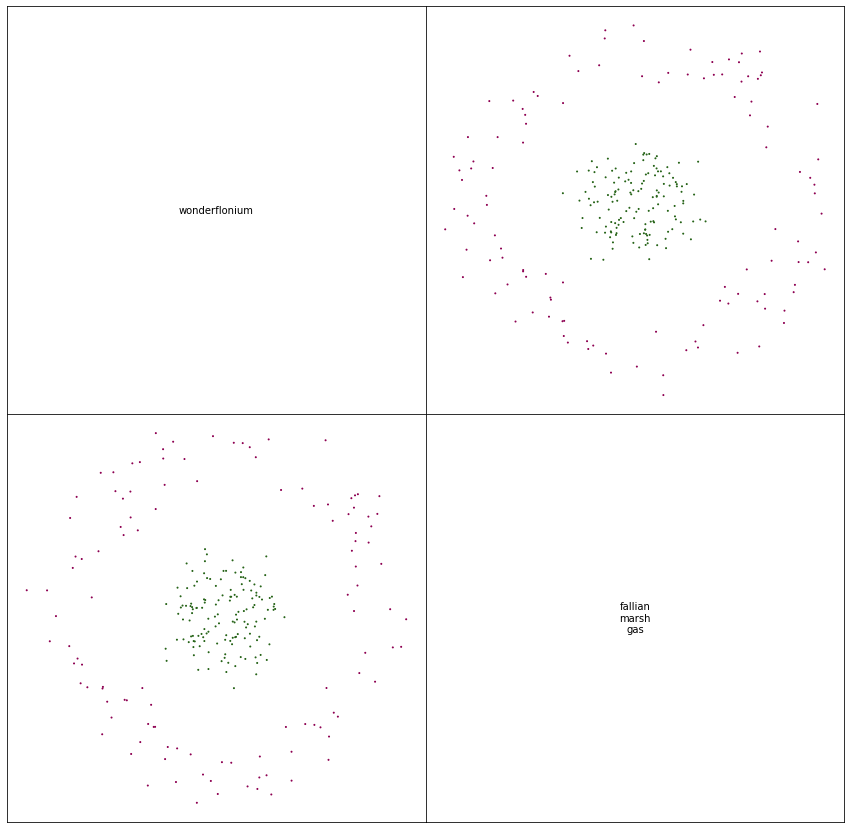

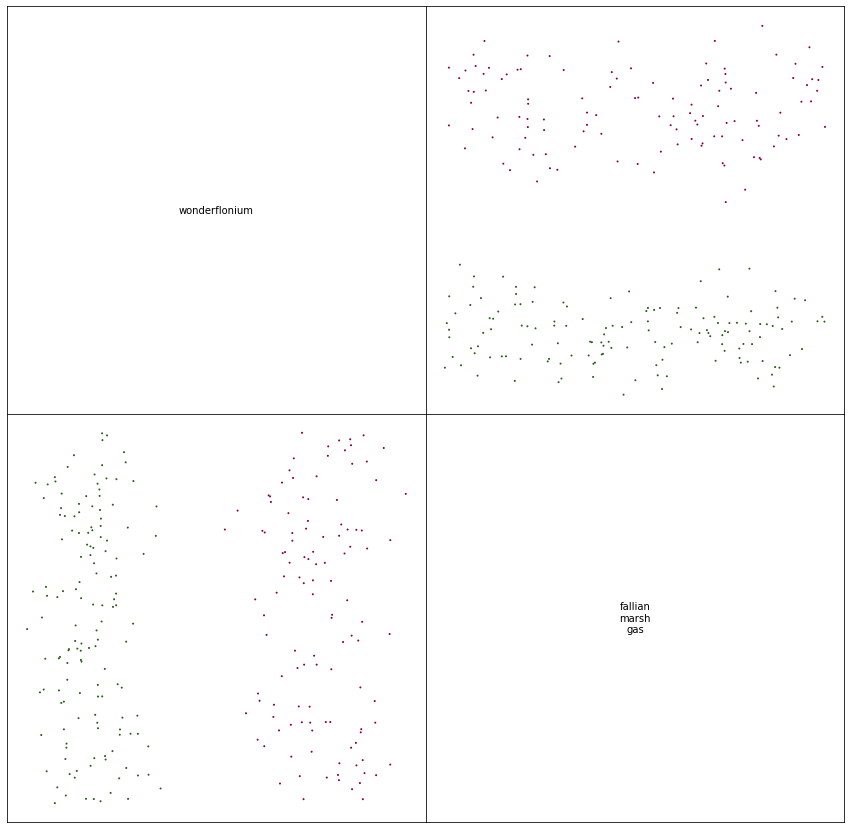

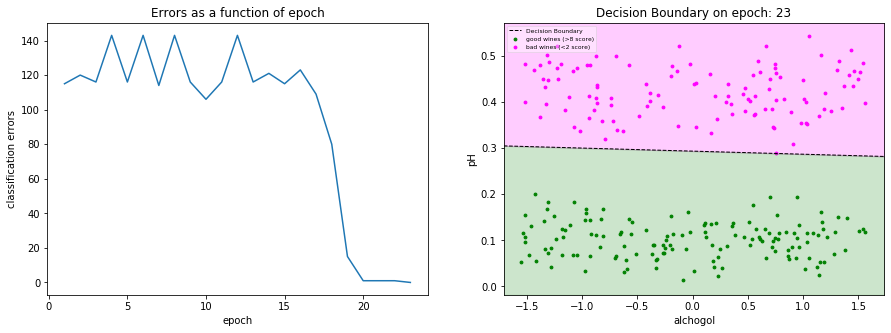

In [17]:
url = "https://raw.githubusercontent.com/katolikyan/sommelier/master/resources/Pan%20Galactic%20Gargle%20Blaster.csv"
try:
    df = pd.read_csv(url, ';')
except FileNotFoundError:
    print("[-] Link doesn't contain .csv file")

bt = 2
gt = 8
pan_gal = happy_panda(df, bt, gt)
pan_normed = norm_data(pan_gal.iloc[:, 0:2])
pan_final = pd.concat([pan_normed.iloc[:], pan_gal.iloc[:, 2:]], axis=1)
plot_scatter_matrix(pan_final, save_plot=False)
r = pd.Series([math.sqrt(x[0]*x[0] + x[1]*x[1]) for x in pan_final.values], name='r').to_frame()
phi = pd.Series([math.atan(x[1] / x[0]) for x in pan_final.values], name='phi').to_frame()
pan_final['wonderflonium'] = r.values
pan_final['fallian marsh gas'] = phi.values
plot_scatter_matrix(pan_final, save_plot=False)

#---training perceptron:
percep = perceptron(2)
percep.learning_simple(pan_final.iloc[:, 0:2].values, \
                         pan_final.loc[:, 'GoodBad'].values, 300, 0.3)
plot_scatter_trained(percep, pan_final.iloc[:, 0:2].values, \
                     pan_final.loc[:, 'GoodBad'].values)